# Data Exploratory

## Setup Environment

In [201]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as  sns
import pickle

## Tracks Exploration

In [62]:
url = "../data/raw_spotify_data.xlsx"

tracks = pd.read_excel(url, sheet_name='tracks')
tracks = tracks.drop(['Unnamed: 0'],axis=1)
tracks.head(3)

,disc_number,duration_ms,explicit,href,id,is_local,name,popularity,preview_url,track_number,type,uri
0,1,239359,True,https://api.spotify.com/v1/tracks/1bDbXMyjaUIo...,1bDbXMyjaUIooNwFE9wn0N,False,Rich Flex,96,https://p.scdn.co/mp3-preview/a1586c5c9b247182...,1,track,spotify:track:1bDbXMyjaUIooNwFE9wn0N
1,1,198973,True,https://api.spotify.com/v1/tracks/6DCZcSspjsKo...,6DCZcSspjsKoFjzjrWoCdn,False,God's Plan,85,https://p.scdn.co/mp3-preview/997cd19a9e46b086...,5,track,spotify:track:6DCZcSspjsKoFjzjrWoCdn
2,1,160821,True,https://api.spotify.com/v1/tracks/7l2nxyx7IkBX...,7l2nxyx7IkBX5orhkALg0V,False,Privileged Rappers,83,https://p.scdn.co/mp3-preview/51ee364e095c4227...,5,track,spotify:track:7l2nxyx7IkBX5orhkALg0V


<AxesSubplot: >

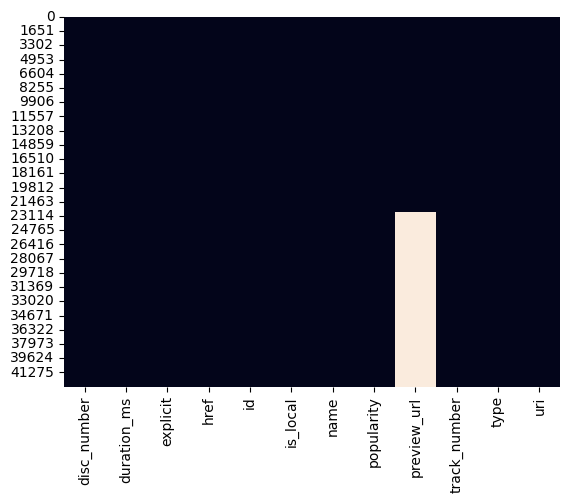

In [67]:
sns.heatmap(tracks.isna(), cbar=False)

In [68]:
# preview_url represents the preview audio file related to a related track
# uri and url represents a web reference of the track info corresponding to the data given in the .xlsx file
# Based on these properties, we can remove them from our dataset because they are not relevant or usable for the final objective.

tracks = tracks.drop(['uri', 'href', 'preview_url'], axis=1)
tracks.head(3)

,disc_number,duration_ms,explicit,id,is_local,name,popularity,track_number,type
0,1,239359,True,1bDbXMyjaUIooNwFE9wn0N,False,Rich Flex,96,1,track
1,1,198973,True,6DCZcSspjsKoFjzjrWoCdn,False,God's Plan,85,5,track
2,1,160821,True,7l2nxyx7IkBX5orhkALg0V,False,Privileged Rappers,83,5,track


In [58]:
# check if the track id is unique
tracks.id.is_unique

False

In [164]:
tracks = tracks.drop_duplicates(keep='first', subset='id')
tracks.id.is_unique

True

In [167]:
# rename the id as track_id
tracks = tracks.rename(columns={'id' : 'track_id'})
tracks.head(2)

,disc_number,duration_ms,explicit,track_id,is_local,name,popularity,track_number,type
0,1,239359,True,1bDbXMyjaUIooNwFE9wn0N,False,Rich Flex,96,1,track
1,1,198973,True,6DCZcSspjsKoFjzjrWoCdn,False,God's Plan,85,5,track


<AxesSubplot: >

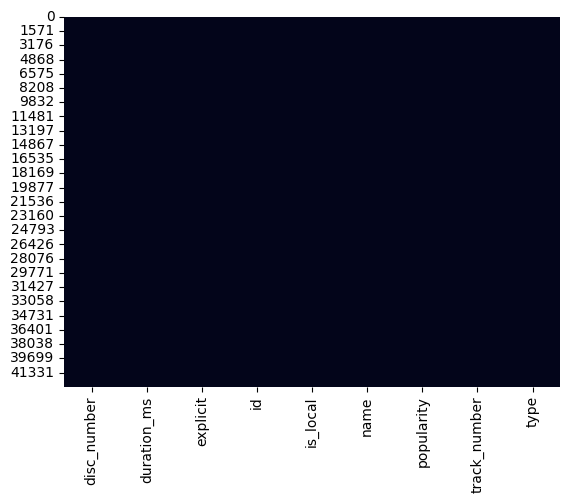

In [61]:
sns.heatmap(tracks.isna(), cbar=False)

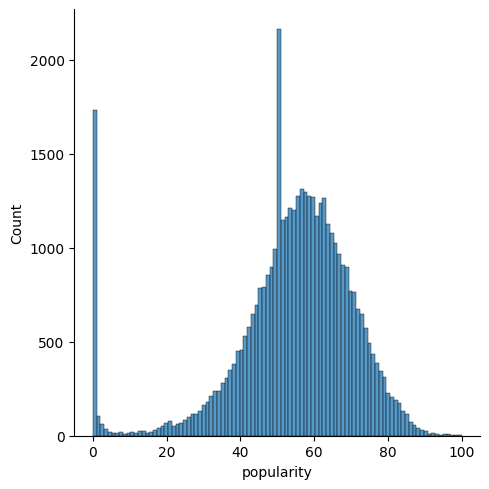

In [76]:
# plot the Y values
sns.displot(data=tracks, x='popularity')

In [100]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42905 entries, 0 to 42904
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   disc_number   42905 non-null  int64 
 1   duration_ms   42905 non-null  int64 
 2   explicit      42905 non-null  bool  
 3   id            42905 non-null  object
 4   is_local      42905 non-null  bool  
 5   name          42905 non-null  object
 6   popularity    42905 non-null  int64 
 7   track_number  42905 non-null  int64 
 8   type          42905 non-null  object
dtypes: bool(2), int64(4), object(3)
memory usage: 2.4+ MB


## Artists Exploration

In [107]:
artists = pd.read_excel(url, sheet_name='artists')
artists = artists.drop(['Unnamed: 0'],axis=1)
artists.head(3)

,href,track_id,id,name,type,uri
0,https://api.spotify.com/v1/artists/3TVXtAsR1In...,1bDbXMyjaUIooNwFE9wn0N,3TVXtAsR1Inumwj472S9r4,Drake,artist,spotify:artist:3TVXtAsR1Inumwj472S9r4
1,https://api.spotify.com/v1/artists/3TVXtAsR1In...,6DCZcSspjsKoFjzjrWoCdn,3TVXtAsR1Inumwj472S9r4,Drake,artist,spotify:artist:3TVXtAsR1Inumwj472S9r4
2,https://api.spotify.com/v1/artists/3TVXtAsR1In...,7l2nxyx7IkBX5orhkALg0V,3TVXtAsR1Inumwj472S9r4,Drake,artist,spotify:artist:3TVXtAsR1Inumwj472S9r4


<AxesSubplot: >

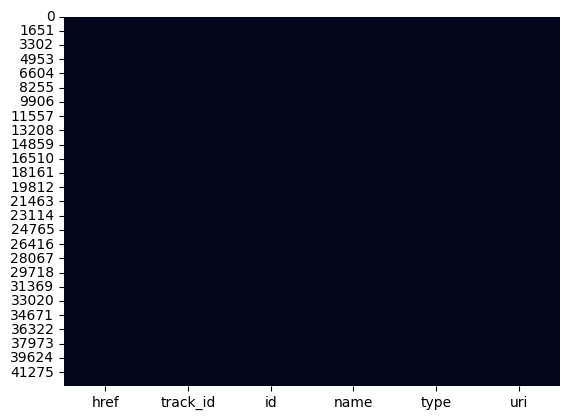

In [108]:
sns.heatmap(artists.isna(), cbar=False)

In [109]:
# drop the same column of the tracks related to url or uri references
artists = artists.drop(['uri', 'href'], axis=1)
artists.head(2)

,track_id,id,name,type
0,1bDbXMyjaUIooNwFE9wn0N,3TVXtAsR1Inumwj472S9r4,Drake,artist
1,6DCZcSspjsKoFjzjrWoCdn,3TVXtAsR1Inumwj472S9r4,Drake,artist


In [110]:
artists = artists.rename(columns={'id' : 'artist_id'})
artists.head(2)

,track_id,artist_id,name,type
0,1bDbXMyjaUIooNwFE9wn0N,3TVXtAsR1Inumwj472S9r4,Drake,artist
1,6DCZcSspjsKoFjzjrWoCdn,3TVXtAsR1Inumwj472S9r4,Drake,artist


In [160]:
# remove duplicates
artists = artists.drop_duplicates(keep='first', subset='track_id')
artists.track_id.is_unique

True

In [111]:
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42905 entries, 0 to 42904
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   track_id   42905 non-null  object
 1   artist_id  42905 non-null  object
 2   name       42905 non-null  object
 3   type       42905 non-null  object
dtypes: object(4)
memory usage: 1.3+ MB


## Album Exploration

In [114]:
albums = pd.read_excel(url, sheet_name='albums')
albums = albums.drop(['Unnamed: 0'],axis=1)
albums.head(3)

,album_type,track_id,href,id,name,release_date,release_date_precision,total_tracks,type,uri
0,album,1bDbXMyjaUIooNwFE9wn0N,https://api.spotify.com/v1/albums/5MS3MvWHJ3lO...,5MS3MvWHJ3lOZPLiMxzOU6,Her Loss,2022-11-04,day,16,album,spotify:album:5MS3MvWHJ3lOZPLiMxzOU6
1,album,6DCZcSspjsKoFjzjrWoCdn,https://api.spotify.com/v1/albums/1ATL5GLyefJa...,1ATL5GLyefJaxhQzSPVrLX,Scorpion,2018-06-29,day,25,album,spotify:album:1ATL5GLyefJaxhQzSPVrLX
2,album,7l2nxyx7IkBX5orhkALg0V,https://api.spotify.com/v1/albums/5MS3MvWHJ3lO...,5MS3MvWHJ3lOZPLiMxzOU6,Her Loss,2022-11-04,day,16,album,spotify:album:5MS3MvWHJ3lOZPLiMxzOU6


<AxesSubplot: >

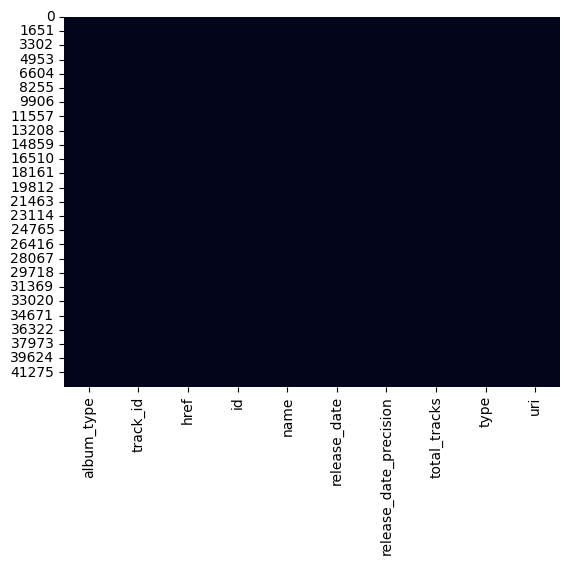

In [115]:
sns.heatmap(albums.isna(), cbar=False)

In [116]:
# drop url and uri references
albums = albums.drop(['uri', 'href'], axis=1)
albums.head(2)

,album_type,track_id,id,name,release_date,release_date_precision,total_tracks,type
0,album,1bDbXMyjaUIooNwFE9wn0N,5MS3MvWHJ3lOZPLiMxzOU6,Her Loss,2022-11-04,day,16,album
1,album,6DCZcSspjsKoFjzjrWoCdn,1ATL5GLyefJaxhQzSPVrLX,Scorpion,2018-06-29,day,25,album


In [195]:
albums = albums.rename(columns={'id' : 'album_id'})
albums.head(2)

,album_type,track_id,album_id,album_name,release_date,release_date_precision,total_tracks,album_type
0,album,1bDbXMyjaUIooNwFE9wn0N,5MS3MvWHJ3lOZPLiMxzOU6,Her Loss,2022-11-04,day,16,album
1,album,6DCZcSspjsKoFjzjrWoCdn,1ATL5GLyefJaxhQzSPVrLX,Scorpion,2018-06-29,day,25,album


In [161]:
# remove duplicates
albums = albums.drop_duplicates(keep='first', subset='track_id')
albums.track_id.is_unique

True

In [126]:
albums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42905 entries, 0 to 42904
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   album_type              42905 non-null  object
 1   track_id                42905 non-null  object
 2   id                      42905 non-null  object
 3   name                    42905 non-null  object
 4   release_date            42905 non-null  object
 5   release_date_precision  42905 non-null  object
 6   total_tracks            42905 non-null  int64 
 7   type                    42905 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.6+ MB


In [127]:
albums.describe()

,total_tracks
count,42905.000000
mean,13.640928
std,12.954985
min,1.000000
25%,6.000000
50%,13.000000
75%,17.000000
max,378.000000


In [131]:
albums.loc[albums.total_tracks == albums.total_tracks.max()]

,album_type,track_id,id,name,release_date,release_date_precision,total_tracks,type
35608,compilation,0UXYvnA1mm2bvxZuHqQlhX,77OkOVnkSBWYsOdbUygLfK,Mozart Motivation,2020-04-23,day,378,album


In [137]:
albums.loc[albums.total_tracks == albums.total_tracks.min()]

,album_type,track_id,id,name,release_date,release_date_precision,total_tracks,type
9,single,127QTOFJsJQp5LbJbu3A1y,3xIwVbGJuAcovYIhzbLO3J,Toosie Slide,2020-04-03,day,1,album
22,single,35RJhm1pEovTBwnNR0zWad,3O6ywzP5LE5msmuBBTpaIN,GREECE (feat. Drake),2020-07-16,day,1,album
31,single,5yY9lUy8nbvjM1Uyo1Uqoc,5uCEoLCj3ZZZ1EtzQdQWVl,Life Is Good (feat. Drake),2020-01-10,day,1,album
38,single,2SAqBLGA283SUiwJ3xOUVI,0qGdc7fNq9RNIPEzZufa43,Laugh Now Cry Later (feat. Lil Durk),2020-08-14,day,1,album
43,single,6Na5uKk5SsqZimk0hAWo8y,1JZxCJ86P4GUYkHj03CgDT,Signs,2017-06-23,day,1,album
...,...,...,...,...,...,...,...,...
42832,single,3UCOxTSO17cTWgIwMxElUA,4VQleiFZPzDaDm3gKCVQST,"Runway (For Club Play Only, Pt. 5)",2018-09-28,day,1,album
42842,single,0NA3qmF7whDKExwYa6V7WD,1hak2w5O0q0sbvPchtei5R,Therapy,2020-01-17,day,1,album
42875,single,0U2GMzCpEOl25moMM3qfBF,5w35vhKYFsJNo9My9N2Gh1,Caja,2022-01-20,day,1,album
42891,single,7F5rc8a0xD6DCloB2kROq9,79GsPr84E13Bbm3VjwZ6PW,Himno A La Alegría,2021-04-15,day,1,album


## Features Exploration

In [138]:
feats = pd.read_excel(url, sheet_name='features')
feats = feats.drop(['Unnamed: 0'],axis=1)
feats.head(3)

,danceability,track_id,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.561,1bDbXMyjaUIooNwFE9wn0N,0.520,11,-9.342,0,0.244,0.05030,0.000002,0.355,0.424,153.150,audio_features,1bDbXMyjaUIooNwFE9wn0N,spotify:track:1bDbXMyjaUIooNwFE9wn0N,https://api.spotify.com/v1/tracks/1bDbXMyjaUIo...,https://api.spotify.com/v1/audio-analysis/1bDb...,239360,3
1,0.754,6DCZcSspjsKoFjzjrWoCdn,0.449,7,-9.211,1,0.109,0.03320,0.000083,0.552,0.357,77.169,audio_features,6DCZcSspjsKoFjzjrWoCdn,spotify:track:6DCZcSspjsKoFjzjrWoCdn,https://api.spotify.com/v1/tracks/6DCZcSspjsKo...,https://api.spotify.com/v1/audio-analysis/6DCZ...,198973,4
2,0.934,7l2nxyx7IkBX5orhkALg0V,0.614,5,-7.384,1,0.198,0.00274,0.000000,0.123,0.616,144.045,audio_features,7l2nxyx7IkBX5orhkALg0V,spotify:track:7l2nxyx7IkBX5orhkALg0V,https://api.spotify.com/v1/tracks/7l2nxyx7IkBX...,https://api.spotify.com/v1/audio-analysis/7l2n...,160821,4


<AxesSubplot: >

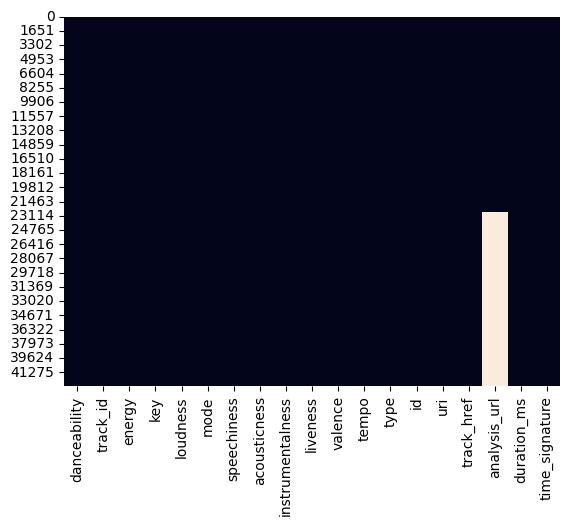

In [139]:
sns.heatmap(feats.isna(), cbar=False)

The "analysis_url" attribute in the dataset has null values because the data are provided by Spotify, and the company did not analyze every track that it manages. This means that some tracks in the dataset do not have an associated analysis, and the "analysis_url" attribute for these tracks is left blank or null.

We can't go deeper to the analysis because the bias could affect the results and the analysis behaviour is out of scope of work. 

In [142]:
# removing the url and uri references, also the analysis one

# drop url and uri references
feats = feats.drop(['uri', 'analysis_url', 'track_href'], axis=1)
feats.head(2)

,danceability,track_id,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,duration_ms,time_signature
0,0.561,1bDbXMyjaUIooNwFE9wn0N,0.520,11,-9.342,0,0.244,0.0503,0.000002,0.355,0.424,153.150,audio_features,1bDbXMyjaUIooNwFE9wn0N,239360,3
1,0.754,6DCZcSspjsKoFjzjrWoCdn,0.449,7,-9.211,1,0.109,0.0332,0.000083,0.552,0.357,77.169,audio_features,6DCZcSspjsKoFjzjrWoCdn,198973,4


In [145]:
# seems like the id and track_id has the same value, I wanna check if my theory is  true.
same_values = feats['id'].eq(feats['track_id']).all()

# Print the result
print(same_values)

True


In [147]:
# My gut instinct works well, so we tested that values in id and track_id are redudant. 
# To performs well, we remove the id value because the track_id is the join column for 
# the final dataset according to the other subsets attributes.

feats =  feats.drop(['id'], axis=1)
feats.head(2)

,danceability,track_id,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature
0,0.561,1bDbXMyjaUIooNwFE9wn0N,0.520,11,-9.342,0,0.244,0.0503,0.000002,0.355,0.424,153.150,audio_features,239360,3
1,0.754,6DCZcSspjsKoFjzjrWoCdn,0.449,7,-9.211,1,0.109,0.0332,0.000083,0.552,0.357,77.169,audio_features,198973,4


In [162]:
feats = feats.drop_duplicates(keep='first', subset='track_id')

# check if the track_id is unique
feats.track_id.is_unique

True

## Merging datasets

In [169]:
# Define the common columns between the subset datasets
common_columns = list(set(tracks.columns) & set(artists.columns) & set(albums.columns) & set(feats.columns))
common_columns

['type', 'track_id']

In [189]:
# before merge we need to change the type name of the common columns
tracks = tracks.rename(columns={'type' : 'track_type', 'name' : 'track_name'})
artists  = artists.rename(columns={'type' : 'artist_type', 'name' : 'artist_name'})
albums = albums.rename(columns={'type' :  'album_type', 'name'  : 'album_name'})
feats =  feats.rename(columns={'type' : 'features_type'})

common_columns = list(set(tracks.columns) & set(artists.columns) & set(albums.columns) & set(feats.columns))
common_columns

['track_id']

In [196]:
# considering that type has different qualitative data domain, we can merge datasets according to the track_id

data = pd.merge(tracks, artists, on='track_id')
data = pd.merge(data, albums, on='track_id')
data = pd.merge(data, feats, on='track_id')

data.describe()

,disc_number,duration_ms_x,popularity,track_number,total_tracks,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms_y,time_signature
count,39863.000000,3.986300e+04,39863.000000,39863.000000,39863.000000,39863.000000,39863.000000,39863.000000,39863.000000,39863.000000,39863.000000,39863.000000,39863.000000,39863.000000,39863.000000,39863.000000,3.986300e+04,39863.000000
mean,1.020144,2.165041e+05,53.554349,5.920453,13.791411,0.620897,0.646868,5.269774,-6.998121,0.630509,0.100884,0.255355,0.043118,0.197268,0.501908,121.759545,2.164982e+05,3.935604
std,0.200272,7.048499e+04,17.072315,6.869679,13.088163,0.159637,0.203528,3.604601,3.585259,0.482673,0.111364,0.274666,0.165099,0.169897,0.237492,29.220254,7.049873e+04,0.344531
min,1.000000,1.918100e+04,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.918200e+04,0.000000
25%,1.000000,1.790660e+05,46.000000,1.000000,7.000000,0.519000,0.520000,2.000000,-8.221500,0.000000,0.036600,0.030300,0.000000,0.096300,0.318000,98.001500,1.790670e+05,4.000000
50%,1.000000,2.083060e+05,56.000000,4.000000,13.000000,0.635000,0.674000,5.000000,-6.238000,1.000000,0.053800,0.145000,0.000002,0.128000,0.497000,121.042000,2.083070e+05,4.000000
75%,1.000000,2.425060e+05,64.000000,8.000000,17.000000,0.739000,0.804000,8.000000,-4.776000,1.000000,0.114000,0.412000,0.000290,0.246000,0.688000,140.059000,2.425135e+05,4.000000
max,11.000000,4.643866e+06,100.000000,262.000000,378.000000,0.981000,0.999000,11.000000,0.642000,1.000000,0.964000,0.996000,0.999000,0.997000,0.991000,220.099000,4.643867e+06,5.000000


In [200]:
data.head(5)

,disc_number,duration_ms_x,explicit,track_id,is_local,track_name,popularity,track_number,track_type,artist_id,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_type,duration_ms_y,time_signature
0,1,239359,True,1bDbXMyjaUIooNwFE9wn0N,False,Rich Flex,96,1,track,3TVXtAsR1Inumwj472S9r4,...,0,0.244,0.050300,0.000002,0.3550,0.424,153.150,audio_features,239360,3
1,1,198973,True,6DCZcSspjsKoFjzjrWoCdn,False,God's Plan,85,5,track,3TVXtAsR1Inumwj472S9r4,...,1,0.109,0.033200,0.000083,0.5520,0.357,77.169,audio_features,198973,4
2,1,160821,True,7l2nxyx7IkBX5orhkALg0V,False,Privileged Rappers,83,5,track,3TVXtAsR1Inumwj472S9r4,...,1,0.198,0.002740,0.000000,0.1230,0.616,144.045,audio_features,160821,4
3,1,218364,True,3F5CgOj3wFlRv51JsHbxhe,False,Jimmy Cooks (feat. 21 Savage),90,14,track,3TVXtAsR1Inumwj472S9r4,...,1,0.175,0.000307,0.000002,0.0930,0.366,165.921,audio_features,218365,4
4,1,189893,True,59nOXPmaKlBfGMDeOVGrIK,False,WAIT FOR U (feat. Drake & Tems),88,7,track,3TVXtAsR1Inumwj472S9r4,...,1,0.340,0.314000,0.000000,0.0686,0.339,83.389,audio_features,189893,4


## Save the result dataset

In [204]:
# Save the result dataset
data.to_csv('../data/explored_spotify_data.csv')